In [79]:
import skimage.io as io
#Prefiro usar o skimage para ler e salvar imagens, mas se quiser pode usar o opencv tambem

In [80]:
#Lendo as imagens q tu me mandou
label = io.imread('Paleta9_img3.5.png')
original = io.imread('Paleta9_img3.jpg')

In [81]:
#As imagens estão com 4 dimensões... isso acontece dependo da forma q vc salva
#O correto é elas terem somente tres dimensoes.. O RGB.
print(label.shape, label.min(), label.max()) # o valor minimo eh 0 (preto) e valor maximo 255 (branco)
print(original.shape)

(768, 1024, 4) 0 255
(768, 1024, 3)


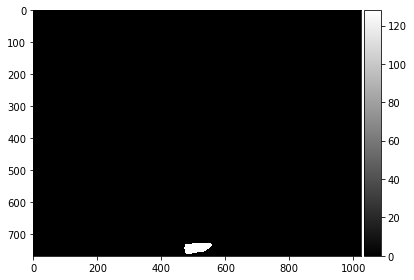

In [82]:
io.imshow(label[:,:,0],cmap='gray') #Veja que a informação do label está somente na primeira dimensao da imagem
#Se comentar a primeira linha e descomentar alguma abaixo vai ver que toda a imagem eh preta
#io.imshow(label[:,:,1],cmap='gray')
#io.imshow(label[:,:,2],cmap='gray')
#io.imshow(label[:,:,3],cmap='gray')#Essa ultima eh toda branca, talvez seja alguma coisa do opencv na hora q vc salvou

In [83]:
label_um_canal = label[:,:,0]

label_um_canal.max() #O maior valor da imagem eh 128

128

In [84]:
#Transformando a imagem em binaria, o que eu fiz foi colocar para true os valores maiores que 10 e
# para 0 os valores menores que 10... isso eh semelhante a limiarizacão q vc estava fazendo, mas escolhi o limiar manualmente
label_um_canal_binaria = label_um_canal > 10
#A imagem binaria (0 ou 1) pode ser representada por True ou False, eh a mesma coisa

(768, 1024)


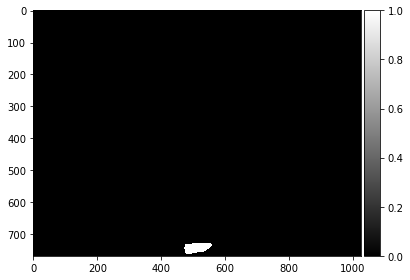

In [85]:
#imagem ficou do mesmo jeito
print(label_um_canal_binaria.shape)#Veja que ela tem somente um canal, ou seja, uma dimensao
io.imshow(label_um_canal_binaria,cmap='gray')

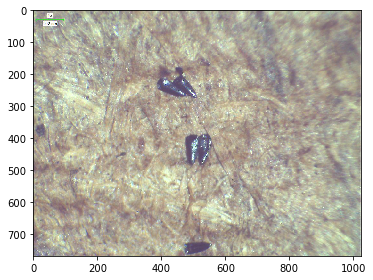

In [86]:
io.imshow(original)#imagem colorida
#io.imshow(original[:,:,0])#Canal vermelho
#io.imshow(original[:,:,1])#Canal verde
#io.imshow(original[:,:,2])#Canal azul
#io.imshow(original[:,:,3])#Por algum motivo a imagem está ficando salva com esse quarto canal que eh
#somente pixels brancos... remove ele, deve ter sido o programa q tu usou pra salvar a imagem que colocou

In [87]:
import copy 
#Removendo essa quarta dimensao
original_tres_dimensoes = copy.copy(original[:,:,0:3])

#Aqui eh para te mostrar o que eu tava falando da multiplicacao... veja que fica a região original do ovo
original_tres_dimensoes[:,:,0] = original[:,:,0]*label_um_canal_binaria
original_tres_dimensoes[:,:,1] = original[:,:,1]*label_um_canal_binaria
original_tres_dimensoes[:,:,2] = original[:,:,2]*label_um_canal_binaria

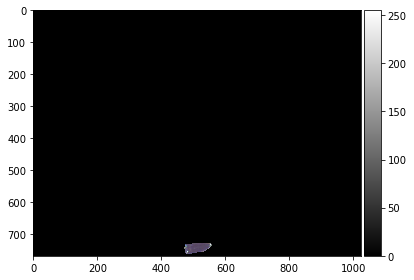

In [88]:
io.imshow(original_tres_dimensoes,cmap='gray')

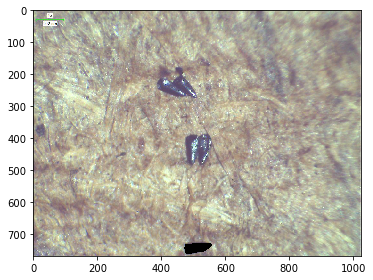

In [89]:
#Verificando se a região do ovo em original_tres_dimensoes esta igual a original
res = original[:,:,0:3]-original_tres_dimensoes
io.imshow(res)

In [90]:
from skimage import img_as_ubyte

#Salvando
io.imsave('mascara_salva.png', img_as_ubyte(label_um_canal_binaria))

<ipython-input-90-b421f7cf3ed9>:4: UserWarning: mascara_salva.png is a low contrast image
  io.imsave('mascara_salva.png', img_as_ubyte(label_um_canal_binaria))


(768, 1024) 255


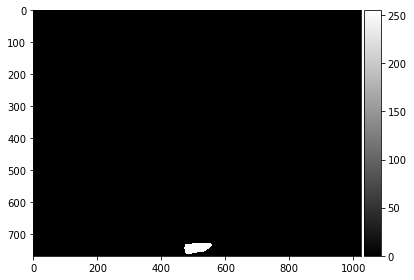

In [91]:
#Verificando se salvou certo
test = io.imread('mascara_salva.png')
print(test.shape, test.max())
io.imshow(test,cmap='gray')